In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
import cv2
from google.colab.patches import cv2_imshow

In [4]:
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [5]:
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [6]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
type(X_train)

numpy.ndarray

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [10]:
X_train[10].shape

(28, 28)

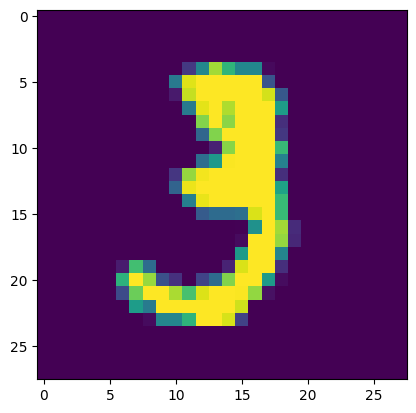

In [11]:
plt.imshow(X_train[10])
plt.show()

In [12]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8545 - loss: 0.5002
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9545 - loss: 0.1527
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9672 - loss: 0.1108
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9740 - loss: 0.0873
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9781 - loss: 0.0714
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9813 - loss: 0.0599
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9842 - loss: 0.0501
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9872 - loss: 0.0424
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9886 - loss: 0.0369
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9904 - loss: 0.0330


In [18]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9650 - loss: 0.1372


In [19]:
print(accuracy, loss)

0.9686999917030334 0.12140244245529175


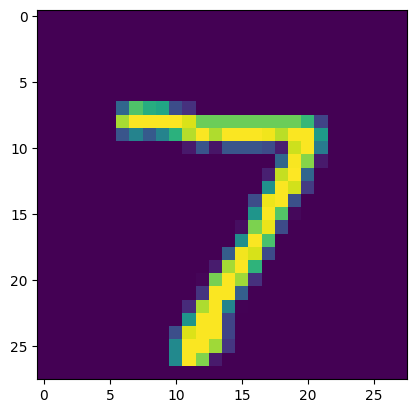

In [20]:
plt.imshow(X_test[0])
plt.show()

In [21]:
print(Y_test[0])

7


In [22]:
Y_pred = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [23]:
Y_pred.shape

(10000, 10)

In [25]:
print(Y_pred[0])

[1.3756861e-10 9.8505389e-08 8.8603294e-09 2.7136162e-05 1.2109638e-12
 4.5626837e-08 4.3565928e-19 9.9994022e-01 1.5494582e-08 3.2428645e-05]


In [28]:
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [29]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(6), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(3), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [30]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 947    0    1    1    4    5    2    4    4   12]
 [   0 1113    1    5    0    1    4    2    8    1]
 [   0    1  987   14    2    0    1   14   13    0]
 [   0    0    3  984    1    4    0    6    3    9]
 [   0    1    3    0  959    0    6    2    2    9]
 [   2    0    0   14    0  861    7    0    5    3]
 [   1    3    1    1    6    9  935    1    1    0]
 [   0    1    4    2    1    0    0  995    3   22]
 [   3    1    3   12    4    4    6    3  932    6]
 [   0    2    0    6   17    1    1    6    2  974]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

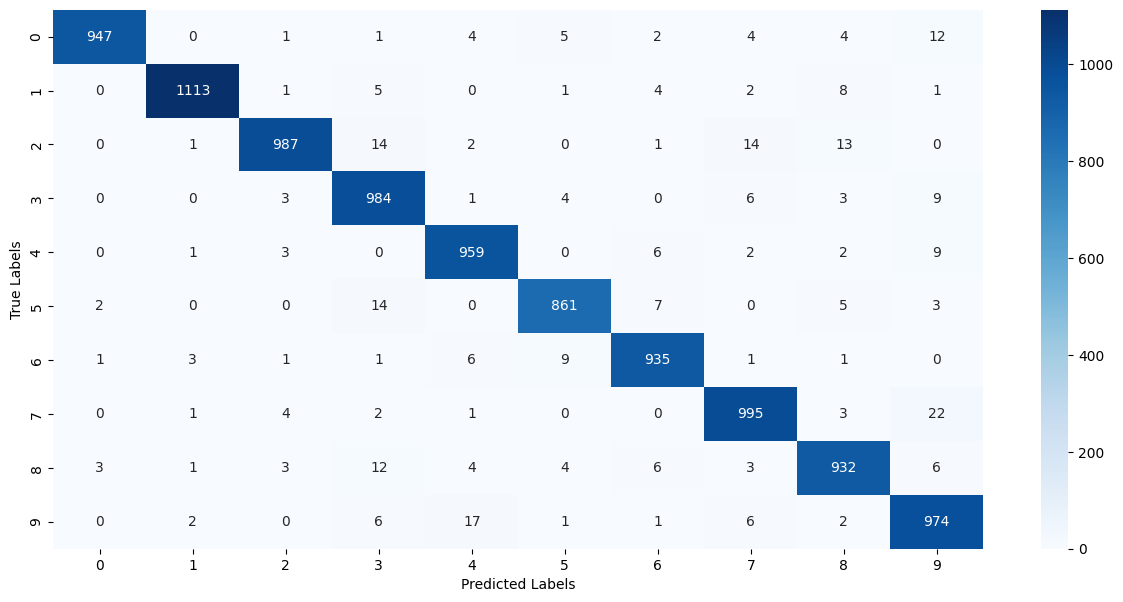

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [32]:
image_path = "/content/digit.png"
image = cv2.imread(image_path)

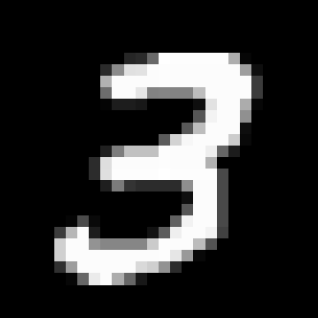

In [33]:
cv2_imshow(image)

In [35]:
image.shape

(318, 318, 3)

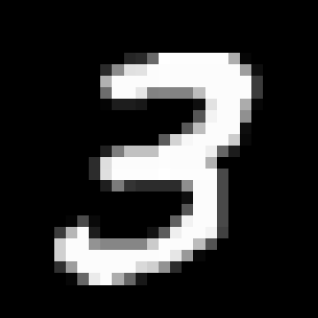

In [34]:
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

In [36]:
image_resize = cv2.resize(grayscale, (28,28))
cv2_imshow(image_resize)

In [37]:
image_resize.shape

(28, 28)

In [38]:
image_resize = image_resize/255

In [39]:
image_reshaped = np.reshape(image_resize, [1,28,28])

In [40]:
input_pred = model.predict(image_reshaped)
print(input_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[2.31409401e-18 1.75564898e-13 1.45620261e-14 1.00000000e+00
  2.49863626e-22 1.07379375e-14 3.91999779e-33 2.56183262e-16
  1.15566703e-12 1.07929954e-09]]


In [41]:
np.argmax(input_pred)

np.int64(3)